# Coding Portion

In [1]:
#Import necessary libraries 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import pygraphviz
import matplotlib.colors as mcolors
import scipy.sparse
import scipy.linalg as sc
import numpy.typing as npt
import random as rd
from sympy import Matrix

In [2]:
pip install networkx==2.7

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [133]:
import numpy.typing as npt

def bmatrix(a: np.NDArray) -> str:
    """Returns a LaTeX bmatrix

    Args:
        a (npt.NDArray): A numpy array
        
    Returns:
        str: A LaTeX bmatrix string representation
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

## Question 1

Finding an incidence matrix

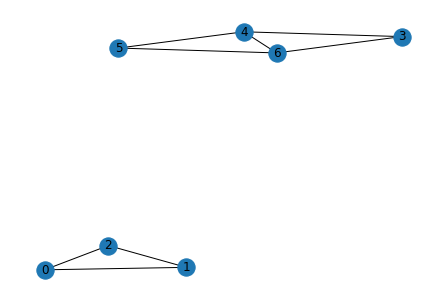

In [267]:
G=nx.Graph()

G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,0)

G.add_edge(4,6)
G.add_edge(5,6)
G.add_edge(4,5)
G.add_edge(3,4)
G.add_edge(3,6)
nx.draw(G, with_labels = True)

In [135]:
A = nx.adjacency_matrix(G).todense()
print(bmatrix(A))

\begin{bmatrix}
  0 & 1 & 1 & 0 & 0 & 0 & 0\\
  1 & 0 & 1 & 0 & 0 & 0 & 0\\
  1 & 1 & 0 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 1 & 1 & 1\\
  0 & 0 & 0 & 1 & 0 & 1 & 1\\
  0 & 0 & 0 & 1 & 1 & 0 & 0\\
  0 & 0 & 0 & 1 & 1 & 0 & 0\\
\end{bmatrix}


/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_63036/2710636833.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


In [136]:
I1 = nx.incidence_matrix(G).todense()
print(bmatrix(I1))

\begin{bmatrix}
  1. & 1. & 0. & 0. & 0. & 0. & 0. & 0.\\
  1. & 0. & 1. & 0. & 0. & 0. & 0. & 0.\\
  0. & 1. & 1. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 1. & 1. & 1. & 0. & 0.\\
  0. & 0. & 0. & 1. & 0. & 0. & 1. & 1.\\
  0. & 0. & 0. & 0. & 1. & 0. & 1. & 0.\\
  0. & 0. & 0. & 0. & 0. & 1. & 0. & 1.\\
\end{bmatrix}


/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_63036/1498036631.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  I1 = nx.incidence_matrix(G).todense()


In [137]:
L1 = nx.laplacian_matrix(G).todense()
print(bmatrix(L1))

\begin{bmatrix}
  2 & -1 & -1 & 0 & 0 & 0 & 0\\
  -1 & 2 & -1 & 0 & 0 & 0 & 0\\
  -1 & -1 & 2 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 3 & -1 & -1 & -1\\
  0 & 0 & 0 & -1 & 3 & -1 & -1\\
  0 & 0 & 0 & -1 & -1 & 2 & 0\\
  0 & 0 & 0 & -1 & -1 & 0 & 2\\
\end{bmatrix}


In [140]:
d = np.diag([val for (node, val) in G.degree()])
eL1=d-A
print(bmatrix(eL1))

\begin{bmatrix}
  2 & -1 & -1 & 0 & 0 & 0 & 0\\
  -1 & 2 & -1 & 0 & 0 & 0 & 0\\
  -1 & -1 & 2 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 3 & -1 & -1 & -1\\
  0 & 0 & 0 & -1 & 3 & -1 & -1\\
  0 & 0 & 0 & -1 & -1 & 2 & 0\\
  0 & 0 & 0 & -1 & -1 & 0 & 2\\
\end{bmatrix}


In [141]:
#Compares the equality of laplacian matrices
np.array_equal(L1,eL1)

True

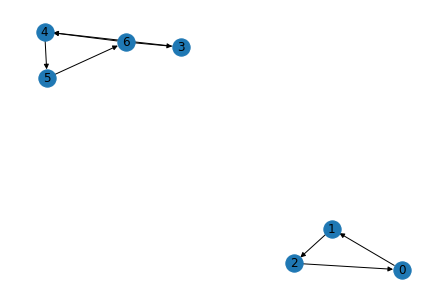

In [142]:
H = nx.DiGraph([(0,1),(1,2),(2,0),(6,4),(5,6),(4,5),(3,4),(6,3)])
nx.draw(H,with_labels = True)


In [143]:
AH = nx.adjacency_matrix(H)
AH = AH.todense()
AH

/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_63036/1341937066.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  AH = nx.adjacency_matrix(H)


matrix([[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]])

In [144]:
B = nx.incidence_matrix(G , oriented = True).todense()
print(bmatrix(B))

\begin{bmatrix}
  -1. & -1. & 0. & 0. & 0. & 0. & 0. & 0.\\
  1. & 0. & -1. & 0. & 0. & 0. & 0. & 0.\\
  0. & 1. & 1. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & -1. & -1. & -1. & 0. & 0.\\
  0. & 0. & 0. & 1. & 0. & 0. & -1. & -1.\\
  0. & 0. & 0. & 0. & 1. & 0. & 1. & 0.\\
  0. & 0. & 0. & 0. & 0. & 1. & 0. & 1.\\
\end{bmatrix}


/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_63036/1918703261.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  B = nx.incidence_matrix(G , oriented = True).todense()


In [145]:
BT = np.transpose(B)
print(bmatrix(BT))

\begin{bmatrix}
  -1. & 1. & 0. & 0. & 0. & 0. & 0.\\
  -1. & 0. & 1. & 0. & 0. & 0. & 0.\\
  0. & -1. & 1. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & -1. & 1. & 0. & 0.\\
  0. & 0. & 0. & -1. & 0. & 1. & 0.\\
  0. & 0. & 0. & -1. & 0. & 0. & 1.\\
  0. & 0. & 0. & 0. & -1. & 1. & 0.\\
  0. & 0. & 0. & 0. & -1. & 0. & 1.\\
\end{bmatrix}


In [146]:
eL2 = np.matmul(B,BT)
print(bmatrix(eL2))

\begin{bmatrix}
  2. & -1. & -1. & 0. & 0. & 0. & 0.\\
  -1. & 2. & -1. & 0. & 0. & 0. & 0.\\
  -1. & -1. & 2. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 3. & -1. & -1. & -1.\\
  0. & 0. & 0. & -1. & 3. & -1. & -1.\\
  0. & 0. & 0. & -1. & -1. & 2. & 0.\\
  0. & 0. & 0. & -1. & -1. & 0. & 2.\\
\end{bmatrix}


In [147]:
np.array_equal(L1,eL2)

True

In [247]:
evals,evecs = np.linalg.eig(L1)
print(evals)

[ 3.00000000e+00 -4.44089210e-16  3.00000000e+00  4.00000000e+00
 -1.11022302e-16  4.00000000e+00  2.00000000e+00]


In [265]:
print(bmatrix(evecs[4]))

\begin{bmatrix}
  0.00000000e+00 & 0.00000000e+00 & 0.00000000e+00 & -2.88675135e-01\\
  -5.00000000e-01 & 8.43156559e-01 & 2.26623326e-16\\
\end{bmatrix}


In [266]:
#From here we see that the eigenvectors 5
print(np.dot(L1, evecs[:,4]))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [190]:
print(bmatrix(evecs[3]))

\begin{bmatrix}
  0.00000000e+00 & 0.00000000e+00 & 0.00000000e+00 & 8.66025404e-01\\
  -5.00000000e-01 & -9.46547200e-02 & 1.35973996e-16\\
\end{bmatrix}


In [165]:
print(bmatrix(evecs[4]))

\begin{bmatrix}
  0.00000000e+00 & 0.00000000e+00 & 0.00000000e+00 & -2.88675135e-01\\
  -5.00000000e-01 & 8.43156559e-01 & 2.26623326e-16\\
\end{bmatrix}


## Question 2
Graphs with circular symmetry: Consider an undirected graph with circular
symmetry, that is a graph G = (V, E) where V = {0, . . . , N − 1} is the set of nodes and E =
{e0, e1, . . . , eN−1} is the set of edges, where e0 = (0, N −1) and ei = (i, i+1), ∀i ∈ {0, . . . , N −2}.


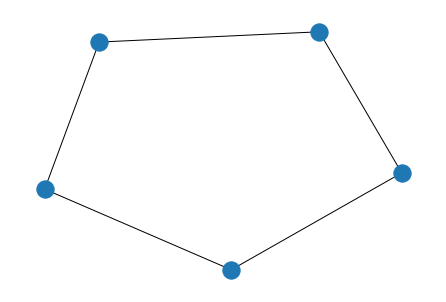

In [197]:
#(a) Assume N = 5, write the edge set and draw the graph.
G2 = nx.cycle_graph(5)


nx.draw(G2)

In [1]:
#(b) In lecture 5 Slide 27, we show that for a cycle graph, the eigenvalues of the Laplacian may
#be computed without the need to perform an eigendecomposition of the matrix L. Validate
#numerically that this statement is correct (hint: you may use numpy’s linalg.eig function to
#compute the eigenvalues and eigenvectors of the Laplacian. You can also use numpy’s b
#function https: // numpy. org/ doc/ stable/ reference/ generated/ numpy. fft. fft.
#html )


xL,yL = np.linalg.eig(nx.laplacian_matrix(G2).todense()).sort()
xL

NameError: name 'np' is not defined

In [31]:
nx.fiedler_vector(G2)

array([-0.37024052,  0.37325232,  0.60092315, -0.0018614 , -0.60207355])

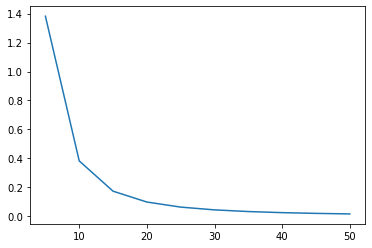

In [235]:
#(c) Plot the Fiedler eigenvalue (the second smallest eigenvalue of the Laplacian) for this type
#of graph as a function of N = 5 up to 50 with step 5, and explain the trend.
def FEplot():
    
    def FE(N):
        G = nx.Graph()
        edge_list = [(N-1, 0)]

        
        for i in range(N-1):
            edge_list.append((i, (i+1))) 
            G.add_edges_from(edge_list)


        eigValue = np.sort(np.linalg.eig(nx.laplacian_matrix(G).todense() )[0])[1]
        return eigValue
    
    N = []
    Fe = []
    i = 5
    while i <= 50:
        N.append(i)
        Fe.append(FE(i))
        i += 5

    return plt.plot(N, Fe)

FEplot()

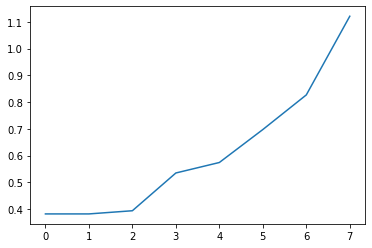

In [5]:
#(d) Now, fix the size of the graph to N = 10. Since you have circular symmetry, you can
#explore adding new edges connecting node 1 to the i-th node ∀i ∈ {2, . . . , N − 1}. Thus,
#you may add an additional N − 3 edges. Explore numerically the trend of the Fiedler
#eigenvalue, as you test the different possible options for the new edges.

def FEplot2():
    
    N = 10
    Num = []
    Val = []
    
    def FE2(N, ep):
        G = nx.Graph()
        edge_list = [(N-1, 0)]
        new_edge_list = []
        
        for i in range(N):
            edge_list.append((i, (i+1)%N)) 
            G.add_edges_from(edge_list)

        for i in range(N-3):
            new_edge_list.append((1, i+3))
            
        for i in range(ep):
            rand = rd.randint(0,len(new_edge_list)-1)
            G.add_edges_from([new_edge_list[rand]]) 
            new_edge_list.remove(new_edge_list[rand])
        
        eigValue = np.sort(np.linalg.eig(nx.laplacian_matrix(G).todense() )[0])[1]
        return eigValue
    
    
    
    for ep in range(N-2):
        Num.append(ep)
        Val.append(FE2(N, ep))
    plt.plot(Num, Val) 

FEplot2()